In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#### Train Data

In [78]:
df_train = pd.read_csv(r'G:\DATASETS\Analytics Vidya\Mobility Analytics\train.csv')
df_train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


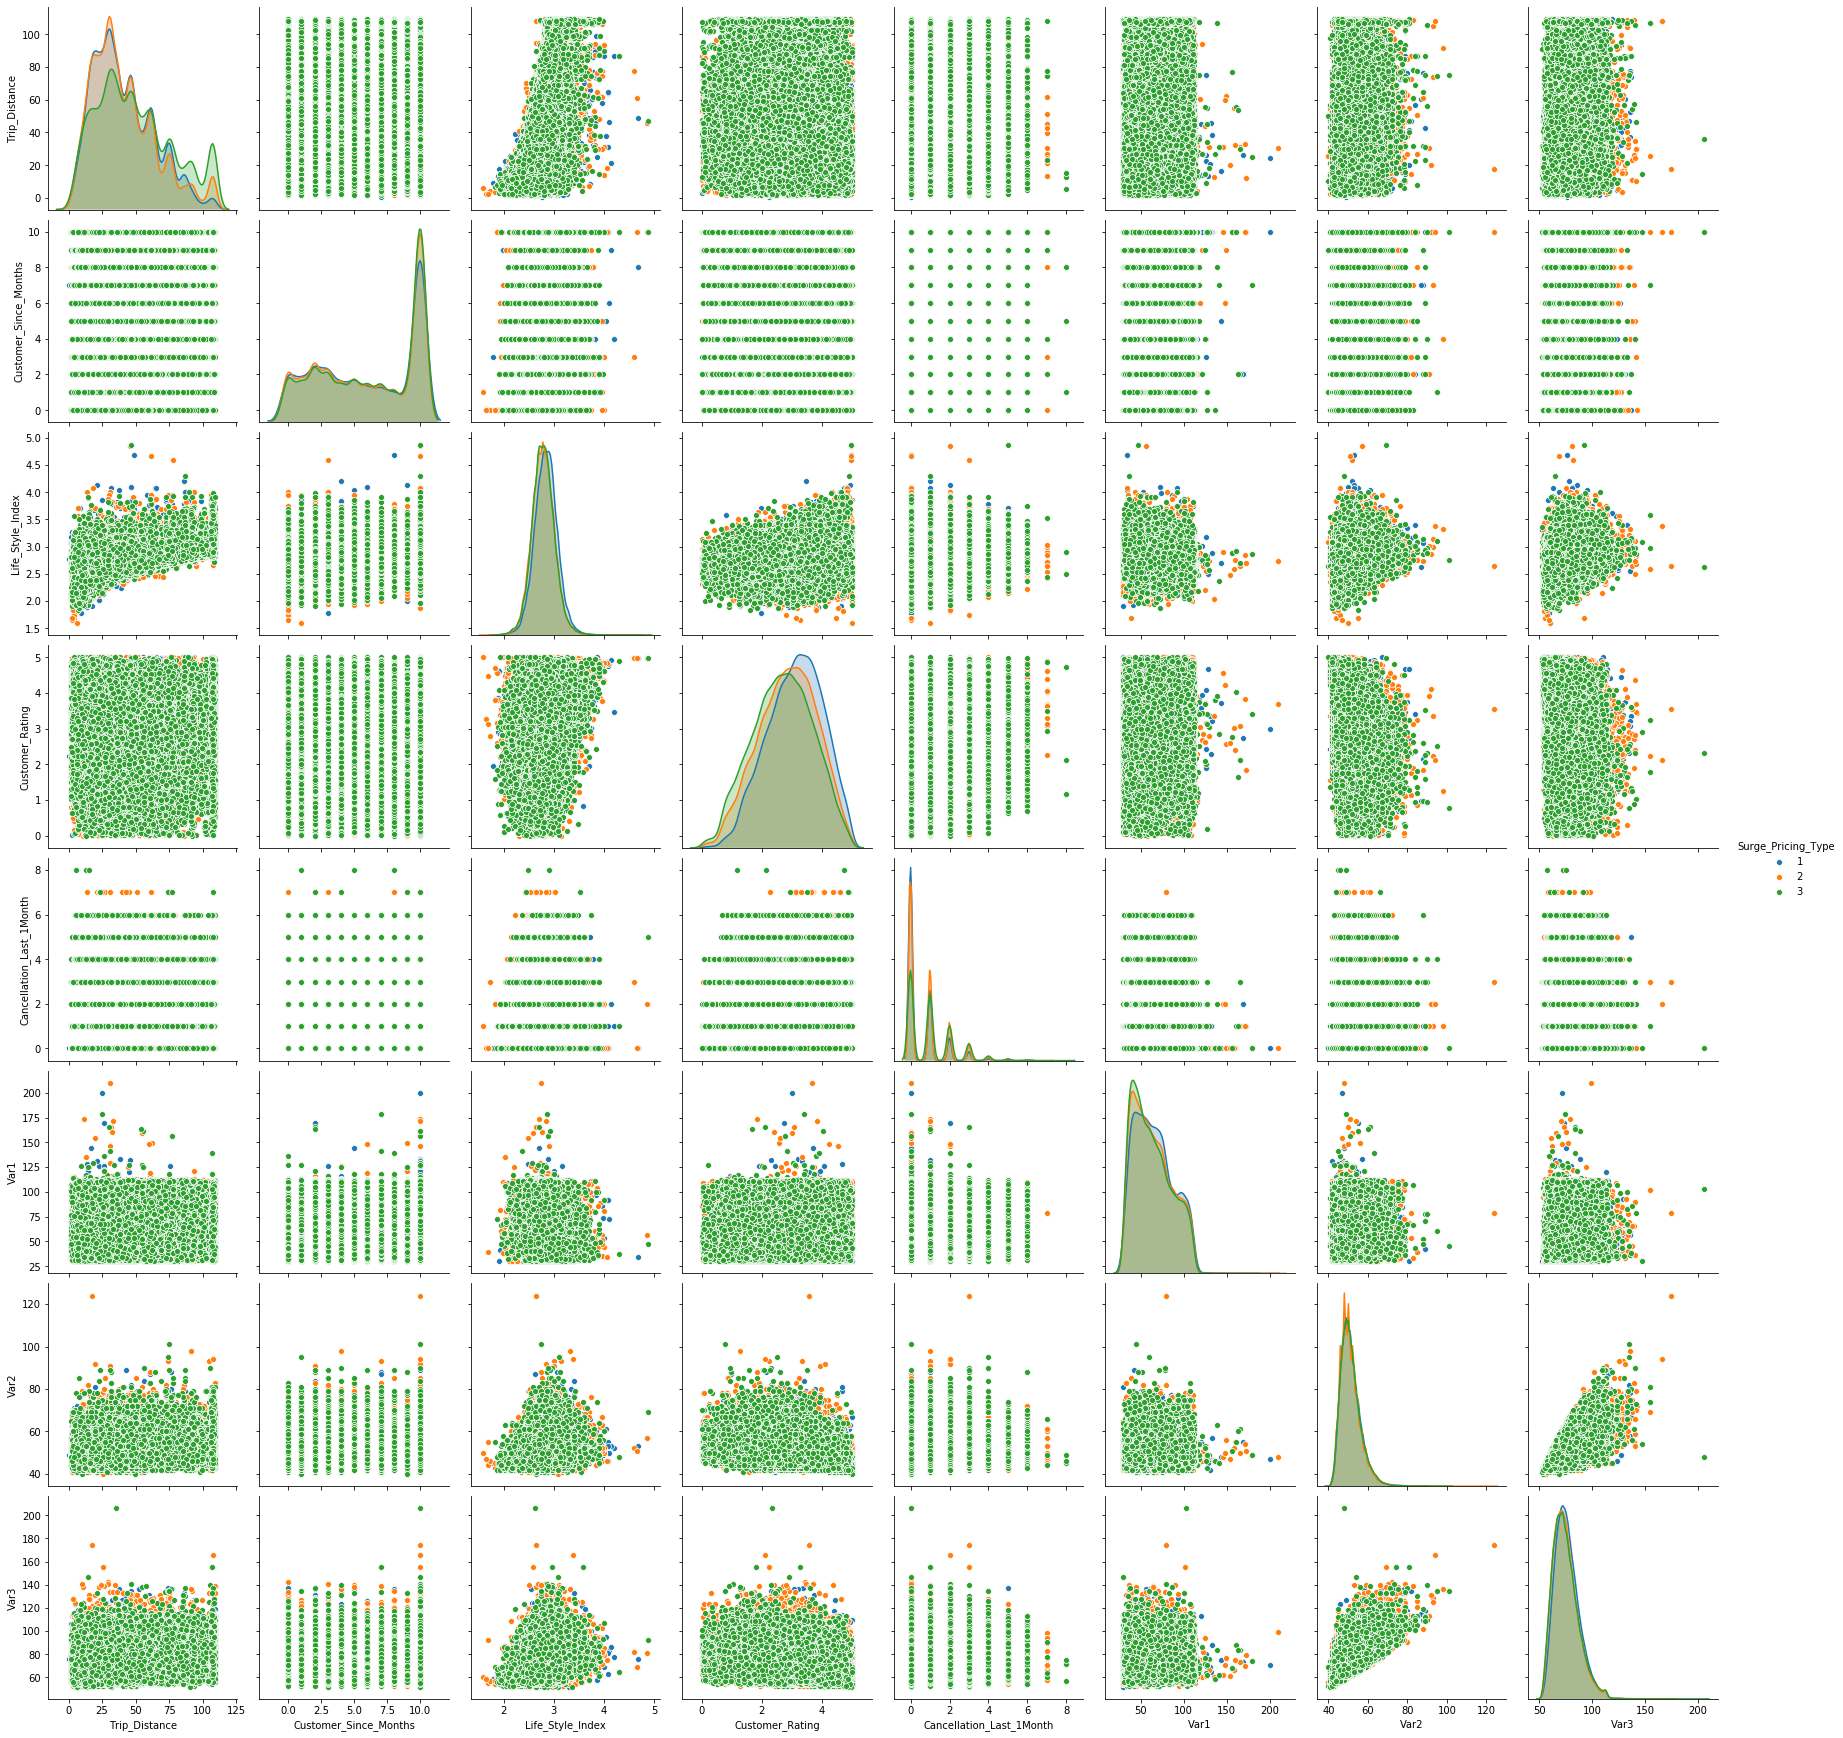

In [5]:
plt.close();
sns.pairplot(df_train,hue='Surge_Pricing_Type',height=3)
plt.show()

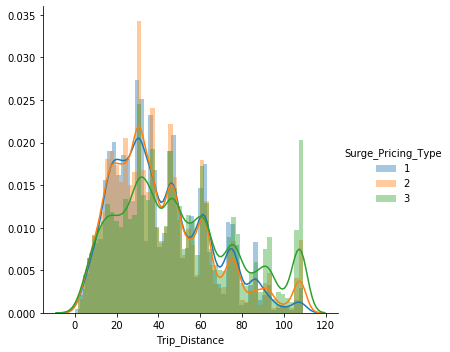

In [6]:
sns.FacetGrid(df_train,hue='Surge_Pricing_Type',height=5).map(sns.distplot,'Trip_Distance').add_legend()

plt.show()

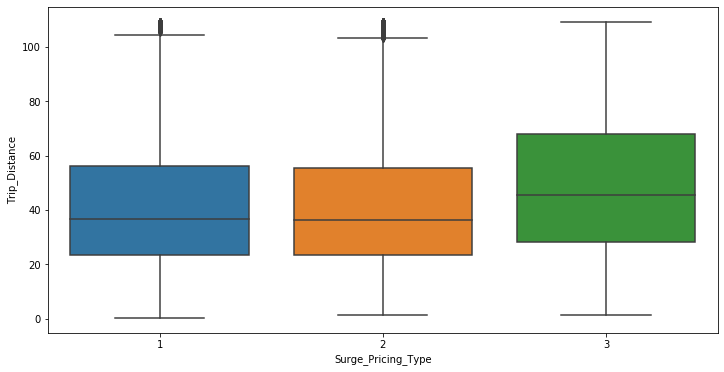

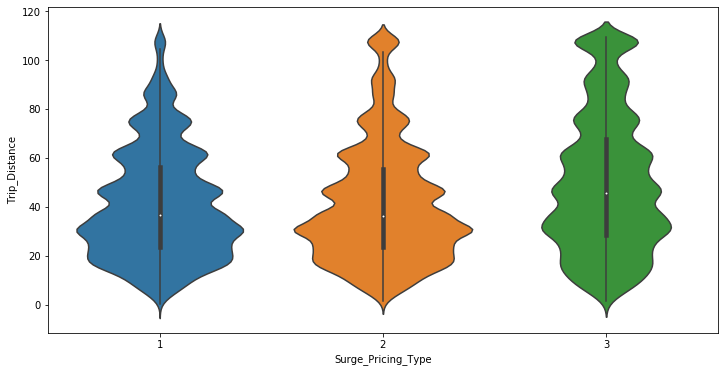

In [7]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(df_train['Surge_Pricing_Type'],df_train['Trip_Distance'])

fig = plt.figure(figsize=(12,6))
sns.violinplot(x='Surge_Pricing_Type',y='Trip_Distance',data=df_train,size=8);

plt.show()


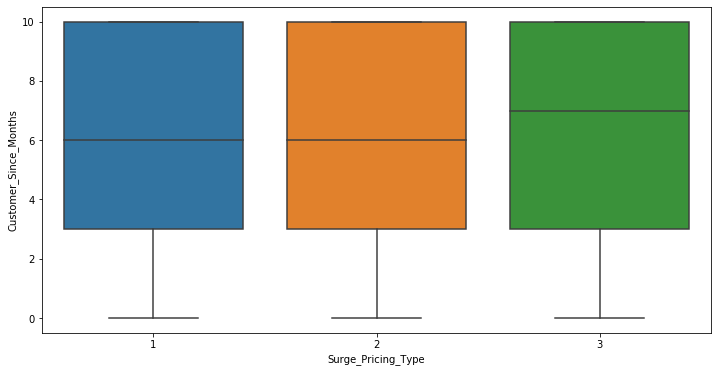

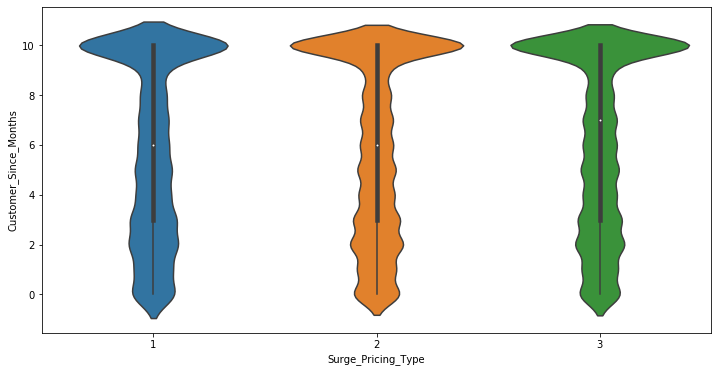

In [8]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(df_train['Surge_Pricing_Type'],df_train['Customer_Since_Months'])

fig = plt.figure(figsize=(12,6))
sns.violinplot(x='Surge_Pricing_Type',y='Customer_Since_Months',data=df_train,size=8);

plt.show()


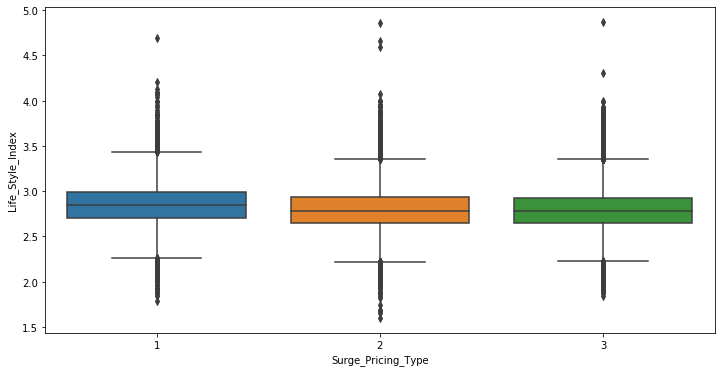

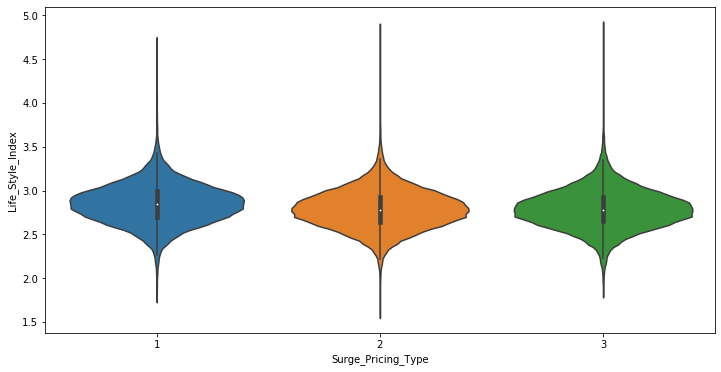

In [9]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(df_train['Surge_Pricing_Type'],df_train['Life_Style_Index'])

fig = plt.figure(figsize=(12,6))
sns.violinplot(x='Surge_Pricing_Type',y='Life_Style_Index',data=df_train,size=8);

plt.show()


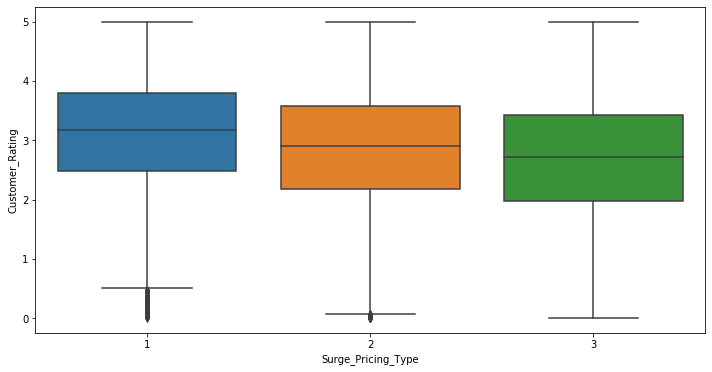

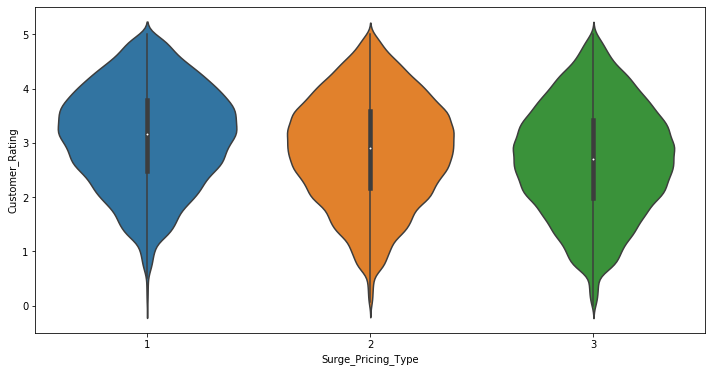

In [10]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(df_train['Surge_Pricing_Type'],df_train['Customer_Rating'])

fig = plt.figure(figsize=(12,6))
sns.violinplot(x='Surge_Pricing_Type',y='Customer_Rating',data=df_train,size=8);

plt.show()

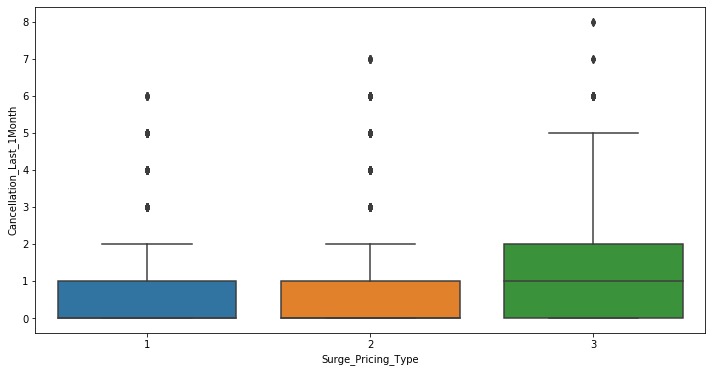

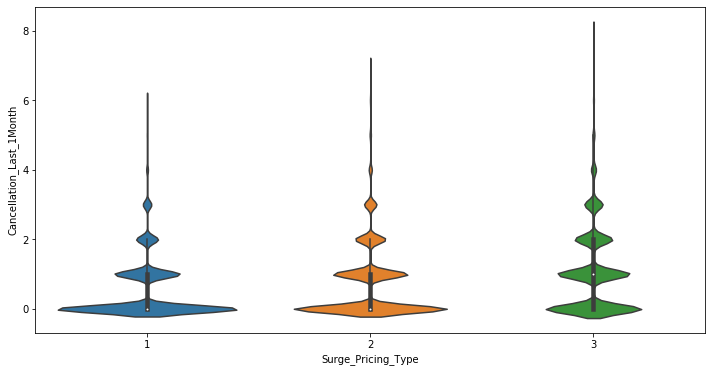

In [11]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(df_train['Surge_Pricing_Type'],df_train['Cancellation_Last_1Month'])

fig = plt.figure(figsize=(12,6))
sns.violinplot(x='Surge_Pricing_Type',y='Cancellation_Last_1Month',data=df_train,size=8);

plt.show()

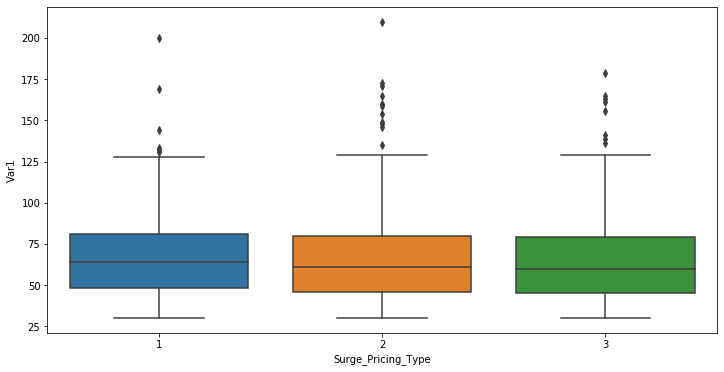

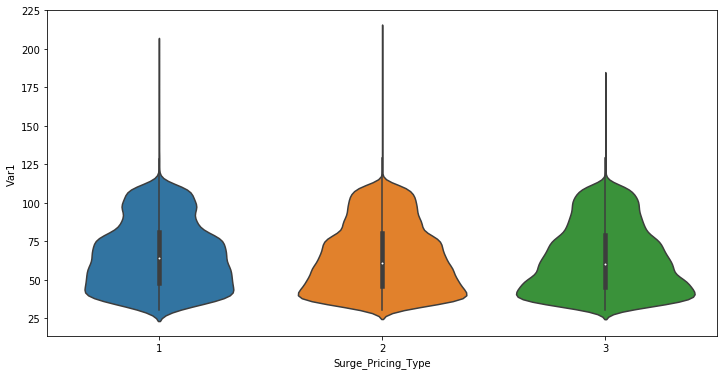

In [12]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(df_train['Surge_Pricing_Type'],df_train['Var1'])

fig = plt.figure(figsize=(12,6))
sns.violinplot(x='Surge_Pricing_Type',y='Var1',data=df_train,size=8);

plt.show()

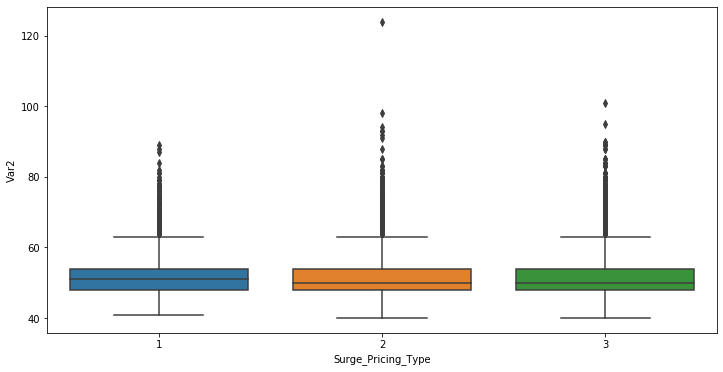

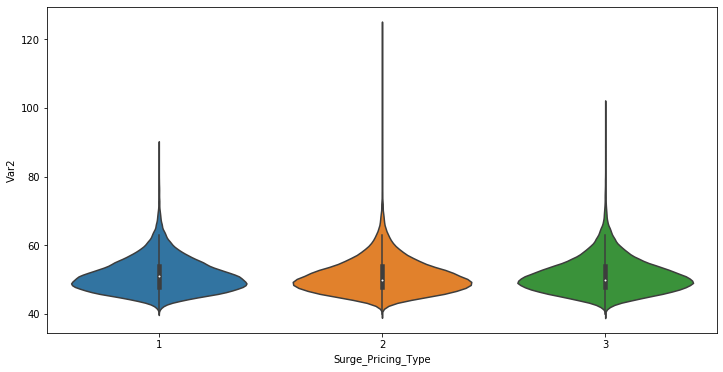

In [13]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(df_train['Surge_Pricing_Type'],df_train['Var2'])

fig = plt.figure(figsize=(12,6))
sns.violinplot(x='Surge_Pricing_Type',y='Var2',data=df_train,size=8);

plt.show()

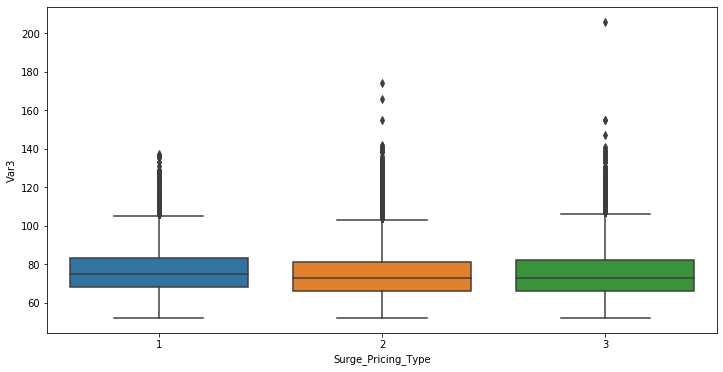

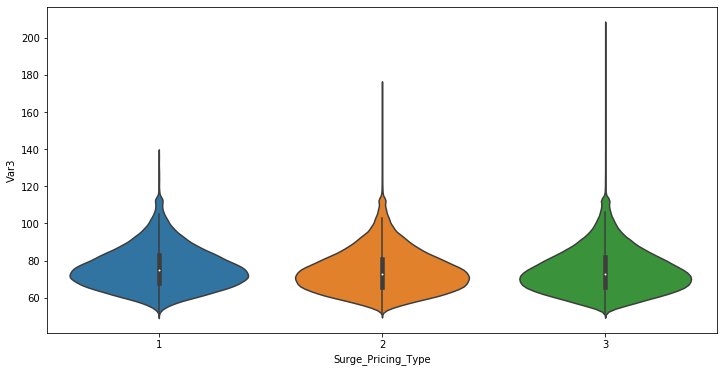

In [14]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(df_train['Surge_Pricing_Type'],df_train['Var3'])

fig = plt.figure(figsize=(12,6))
sns.violinplot(x='Surge_Pricing_Type',y='Var3',data=df_train,size=8);

plt.show()

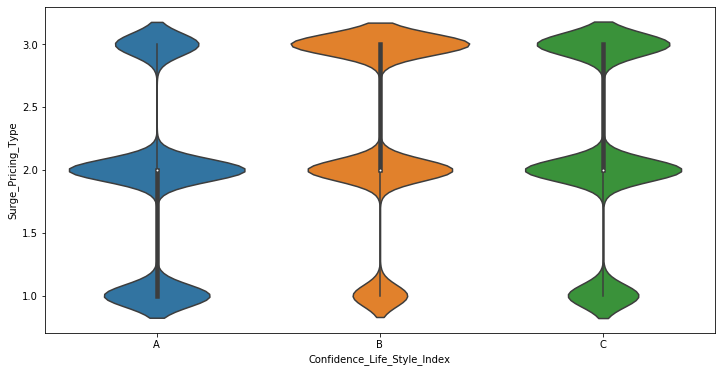

In [15]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x='Confidence_Life_Style_Index',y='Surge_Pricing_Type',data=df_train,size=8);

plt.show()

From above graphs I am observing that only few columns have "outliers".

In [3]:
df_train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
df_train.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [5]:
100-(len(df_train) -71030)*100/len(df_train)  ## ~54% data missing in Var1

53.948747550546095

In [6]:
100-(len(df_train) -20193)*100/len(df_train)  
## ~15 data missing in the columns of Type_of_Cab,Life_Style_Index,Confidence_Life_Style_Index.
## Customer_Since_Months   has less missing data         

15.336999286050641

In [7]:
df_train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [15]:
df_train[df_train['Var1'].isna()]['Surge_Pricing_Type'].value_counts()

2    29740
3    23375
1    17915
Name: Surge_Pricing_Type, dtype: int64

In [16]:
df_train['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [79]:
## Here i am using mean or mode data has very less outlier values

df_train['Type_of_Cab'].fillna(df_train['Type_of_Cab'].mode()[0],inplace=True)
df_train['Customer_Since_Months'].fillna(df_train['Customer_Since_Months'].mode()[0],inplace=True)
df_train['Life_Style_Index'].fillna(df_train['Life_Style_Index'].mean(),inplace=True)
df_train['Confidence_Life_Style_Index'].fillna(df_train['Confidence_Life_Style_Index'].mode()[0],inplace=True)

df_train.drop(['Var1','Trip_ID'],axis=1,inplace=True)  ## Var1 has 53% missing data

In [80]:
df_train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.427690,A,A,3.90500,0,46,60,Female,2
1,29.47,B,10.0,2.782450,B,A,3.45000,0,56,78,Male,2
2,41.58,B,10.0,2.802064,B,E,3.50125,2,56,77,Male,2
3,61.56,C,10.0,2.802064,B,A,3.45375,0,52,74,Male,3
4,54.95,C,10.0,3.034530,B,A,3.40250,4,49,102,Male,2


In [81]:
df_train.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [82]:
#df_train.Type_of_Cab.unique() 
                #['B', 'C', 'E', 'D', 'A']
#df_train.Confidence_Life_Style_Index.unique() 
                #['A', 'B', 'C']
#df_train.Destination_Type.unique() 
                #['A', 'E', 'B', 'C', 'G', 'D', 'F', 'K', 'L', 'H', 'I', 'J', 'M','N']
#df_train.Gender.unique() 
                #['Female', 'Male']

In [83]:
categorical_columns = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,OneHotEncoder,MinMaxScaler

In [23]:
y= df_train['Surge_Pricing_Type']
X = df_train.drop(['Surge_Pricing_Type'],axis=1)
X_dummies = pd.get_dummies(X,columns=categorical_columns,drop_first=True)

In [24]:
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(X_dummies,y,test_size=0.25)

In [25]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [26]:
def model_build(model_name,X_train,X_test,y_train,y_test):
    model =model_name()
    model.fit(X_train,y_train)
    return accuracy_score(y_test,model.predict(X_test))

After applying RandomizedSearchCV on RandomForestClassifier i have got best parameters below

n_estimeters=300,criterion='entropy',min_samples_split =3


In [27]:
model_build(RandomForestClassifier,X_train_d,X_test_d,y_train_d,y_test_d)

0.6757200145825738

In [28]:
RFC_d = RandomForestClassifier(300,'entropy',min_samples_split=3)
RFC_d.fit(X_train_d,y_train_d)
pred = RFC_d.predict(X_test_d)
accuracy_score(y_test_d,pred)

0.680398590351197

In [29]:
model_build(AdaBoostClassifier,X_train_d,X_test_d,y_train_d,y_test_d)

0.6747174626321546

In [30]:
AC_d = AdaBoostClassifier(n_estimators=300,learning_rate=0.5)
AC_d.fit(X_train_d,y_train_d)
pred = AC_d.predict(X_test_d)
accuracy_score(y_test_d,pred)

0.6772086523271358

In [31]:
model_build(GradientBoostingClassifier,X_train_d,X_test_d,y_train_d,y_test_d)

0.6840746141694009

In [84]:
GBC_d = GradientBoostingClassifier(n_estimators=300,min_samples_split=3)
GBC_d.fit(X_train_d,y_train_d)
pred = GBC_d.predict(X_test_d)
accuracy_score(y_test_d,pred)

0.6893607971807024

In [33]:
model_d = VotingClassifier(estimators=[('rf',RFC_d),('ac',AC_d),('gbc',GBC_d)])
model_d.fit(X_train_d,y_train_d)
accuracy_score(y_test_d,model_d.predict(X_test_d))

0.6850771661198202

### Feature Scaling

In [52]:
X_dummies.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.427690,3.90500,0,46,60,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.782450,3.45000,0,56,78,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.802064,3.50125,2,56,77,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.802064,3.45375,0,52,74,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.034530,3.40250,4,49,102,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### StandardScaler

In [85]:
scale_std = StandardScaler()
X_std = scale_std.fit_transform(X_dummies)

In [86]:
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,y,test_size=0.25)

In [56]:
model_build(RandomForestClassifier,X_train_std,X_test_std,y_train_std,y_test_std)

0.6770567505164662

In [57]:
model_build(AdaBoostClassifier,X_train_std,X_test_std,y_train_std,y_test_std)

0.6731680641633249

In [87]:
GBC_std = GradientBoostingClassifier(n_estimators=300)
GBC_std.fit(X_train_std,y_train_std)
pred = GBC_std.predict(X_test_std)
accuracy_score(y_test_std,pred)

0.6930975817231741

In [58]:
model_build(GradientBoostingClassifier,X_train_std,X_test_std,y_train_std,y_test_std)

0.6825555960627051

In [59]:
model_std = VotingClassifier(estimators=[('rf',RandomForestClassifier()),('ac',AdaBoostClassifier()),('gbc',GradientBoostingClassifier())])
model_std.fit(X_train_std,y_train_std)
accuracy_score(y_test_std,model_std.predict(X_test_std))

0.6825555960627051

#### Minmaxscale

In [88]:
scale_min = MinMaxScaler()
X_min = scale_min.fit_transform(X_dummies)

In [89]:
X_train_min,X_test_min,y_train_min,y_test_min = train_test_split(X_min,y,test_size=0.25)

In [63]:
model_build(RandomForestClassifier,X_train_min,X_test_min,y_train_min,y_test_min)

0.6782415846396889

In [64]:
model_build(AdaBoostClassifier,X_train_min,X_test_min,y_train_min,y_test_min)

0.6759022967553773

In [ ]:
model = AdaBoostClassifier(n_estimators=300,learning_rate=0.5)
model.fit(X_train_d,y_train_d)
pred = model.predict(X_test_d)
accuracy_score(y_test_d,pred)

In [65]:
model_build(GradientBoostingClassifier,X_train_min,X_test_min,y_train_min,y_test_min)

0.685107546481954

In [90]:
GBC_min = GradientBoostingClassifier(n_estimators=300,min_samples_split=3)
GBC_min.fit(X_train_min,y_train_min)
pred = GBC_min.predict(X_test_min)
accuracy_score(y_test_min,pred)

0.6915785636164783

In [66]:
model_min = VotingClassifier(estimators=[('rf',RandomForestClassifier()),('ac',AdaBoostClassifier()),('gbc',GradientBoostingClassifier())])
model_min.fit(X_train_min,y_train_min)
accuracy_score(y_test_min,model_min.predict(X_test_min))

0.6845303196014096

#### Feature Selections

In [35]:
X_dummies.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.427690,3.90500,0,46,60,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.782450,3.45000,0,56,78,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.802064,3.50125,2,56,77,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.802064,3.45375,0,52,74,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.034530,3.40250,4,49,102,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
from sklearn.feature_selection import SelectFromModel,SelectKBest,VarianceThreshold

In [37]:
filter_constant = VarianceThreshold(0.01)

In [38]:
filter_constant.fit(X_dummies)

VarianceThreshold(threshold=0.01)

In [39]:
filter_constant.get_support().sum()

20

In [50]:
len(X_dummies.columns)

27

In [42]:
X_tarin_filter_constant = filter_constant.transform(X_train_d)
X_test_filter_constant = filter_constant.transform(X_test_d)

In [47]:
model_build(GradientBoostingClassifier,X_tarin_filter_constant,X_test_filter_constant,y_train_d,y_test_d)

0.6841049945315348

In [49]:
model = GradientBoostingClassifier(n_estimators=300,min_samples_split=3)
model.fit(X_tarin_filter_constant,y_train_d)
pred = model.predict(X_test_filter_constant)
accuracy_score(y_test_d,pred)

0.6865050431401142

In [48]:
model_build(AdaBoostClassifier,X_tarin_filter_constant,X_test_filter_constant,y_train_d,y_test_d)

0.6744440393729493

In [53]:
len(X_train_d.columns)

27

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [56]:
sfs = SFS(GradientBoostingClassifier(n_estimators=300,min_samples_split=3,random_state=7),
         k_features=(3,10),
         forward=True,
         verbose=2,
         scoring='accuracy',
         cv=2,
         n_jobs=-1,
         ).fit(X_train_d,y_train_d)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 10.0min finished

[2020-05-17 21:03:37] Features: 1/10 -- score: 0.5370749194904098[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed: 11.4min finished

[2020-05-17 21:15:04] Features: 2/10 -- score: 0.5934113786887569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 12.3min finished

[2020-05-17 21:27:21] Features: 3/10 -- score: 0.6176351447147226[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 13.2min finished

[2020-05-17 21:40:32] Features: 4/10 -- score: 0.673303222409009[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed: 13.7min finished

[

##### Select from model

In [71]:
SFM = SelectFromModel(GradientBoostingClassifier())
X_sfm = SFM.fit_transform(X_dummies,y)

In [84]:
X_dummies.iloc[:,SFM.get_support()]

,Trip_Distance,Cancellation_Last_1Month,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E
0,6.77,0,1,0,0,0
1,29.47,0,1,0,0,0
2,41.58,2,1,0,0,0
3,61.56,0,0,1,0,0
4,54.95,4,0,1,0,0
...,...,...,...,...,...,...
131657,11.72,0,0,0,1,0
131658,74.81,0,0,1,0,0
131659,40.17,0,0,1,0,0
131660,46.88,1,1,0,0,0


In [72]:
X_train_sfm,X_test_sfm,y_train_sfm,y_test_sfm = train_test_split(X_sfm,y,test_size=0.25)

In [73]:
model_GBC_sfm = GradientBoostingClassifier(n_estimators=300,min_samples_split=3)
model_GBC_sfm.fit(X_train_sfm,y_train_sfm)
pred = model_GBC_sfm.predict(X_test_sfm)
accuracy_score(y_test_sfm,pred)

0.6761149592903147

In [74]:
model = RandomForestClassifier(300,'entropy',min_samples_split=3)
model.fit(X_train_sfm,y_train_sfm)
pred = model.predict(X_test_sfm)
accuracy_score(y_test_sfm,pred)

0.5787762790132458

For this problem if I reduce the features I am getting low accuracy due less number of features.

### Without deleting Var1 feature

In [72]:
df_train = pd.read_csv(r'G:\DATASETS\Analytics Vidya\Mobility Analytics\train.csv')
df_train.head()

df_train['Type_of_Cab'].fillna(df_train['Type_of_Cab'].mode()[0],inplace=True)
df_train['Customer_Since_Months'].fillna(df_train['Customer_Since_Months'].mode()[0],inplace=True)
df_train['Life_Style_Index'].fillna(df_train['Life_Style_Index'].mean(),inplace=True)
df_train['Confidence_Life_Style_Index'].fillna(df_train['Confidence_Life_Style_Index'].mode()[0],inplace=True)
df_train['Var1'].fillna(df_train['Var1'].median(),inplace=True)

df_train.drop(['Trip_ID'],axis=1,inplace=True)  

In [73]:
y= df_train['Surge_Pricing_Type']
X = df_train.drop(['Surge_Pricing_Type'],axis=1)
X_dummies = pd.get_dummies(X,columns=categorical_columns,drop_first=True)

In [74]:
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(X_dummies,y,test_size=0.25)

In [130]:
model_build(RandomForestClassifier,X_train_d,X_test_d,y_train_d,y_test_d)

0.6837100498237939

In [131]:
RFC_d = RandomForestClassifier(300,'entropy',min_samples_split=3)
RFC_d.fit(X_train_d,y_train_d)
pred = RFC_d.predict(X_test_d)
accuracy_score(y_test_d,pred)

0.6852290679304898

In [132]:
model_build(AdaBoostClassifier,X_train_d,X_test_d,y_train_d,y_test_d)

0.6778770202940819

In [133]:
AC_d = AdaBoostClassifier(n_estimators=300,learning_rate=0.5)
AC_d.fit(X_train_d,y_train_d)
pred = AC_d.predict(X_test_d)
accuracy_score(y_test_d,pred)

0.6822821728034998

In [134]:
model_build(GradientBoostingClassifier,X_train_d,X_test_d,y_train_d,y_test_d)

0.6887228095758902

In [75]:
GBC_dv = GradientBoostingClassifier(n_estimators=300,min_samples_split=3)
GBC_dv.fit(X_train_d,y_train_d)
pred = GBC_dv.predict(X_test_d)
accuracy_score(y_test_d,pred)

0.6893607971807024

In [136]:
model_d = VotingClassifier(estimators=[('rf',RFC_d),('ac',AC_d),('gbc',GBC_d)])
model_d.fit(X_train_d,y_train_d)
accuracy_score(y_test_d,model_d.predict(X_test_d))

0.6912747599951391

In [102]:
from statistics import mode

### Test Data

In [67]:
df_test = pd.read_csv(r'G:\DATASETS\Analytics Vidya\Mobility Analytics\test.csv')
df_test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [68]:
Trip_ID  = df_test['Trip_ID']

In [69]:
df_test.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [76]:
df_test['Type_of_Cab'].fillna(df_test['Type_of_Cab'].mode()[0],inplace=True)
df_test['Customer_Since_Months'].fillna(df_test['Customer_Since_Months'].mode()[0],inplace=True)
df_test['Life_Style_Index'].fillna(df_test['Life_Style_Index'].mean(),inplace=True)
df_test['Confidence_Life_Style_Index'].fillna(df_test['Confidence_Life_Style_Index'].mode()[0],inplace=True)
df_test['Var1'].fillna(df_train['Var1'].median(),inplace=True)
df_test.drop(['Trip_ID'],axis=1,inplace=True)  ## Var1 has 53% missing data in training data

In [77]:
test_dummies_var1 = pd.get_dummies(df_test,columns=categorical_columns,drop_first=True)

In [99]:
pred_d = GBC_d.predict(test_dummies_var1)

In [101]:
pred_dv =  GBC_dv.predict(test_dummies_var1)

In [96]:
test_min = scale_min.transform(test_dummies_var1)
pred_min = GBC_min.predict(test_min)

In [97]:
test_std = scale_std.transform(test_dummies_var1)
pred_std = GBC_std.predict(test_std)

In [103]:
p= []
for i,j,k,l in zip(pred_d,pred_dv,pred_min,pred_std):
    try:
        p.append(mode([i,j,k,l]))
    except:
        p.append(mode([i,j,k]))

In [104]:
sub_data = pd.DataFrame({'Trip_ID':Trip_ID,'Surge_Pricing_Type':p})
sub_data.to_csv('final_submission.csv',index=False)

### Results 

In [1]:
from IPython.display import Image

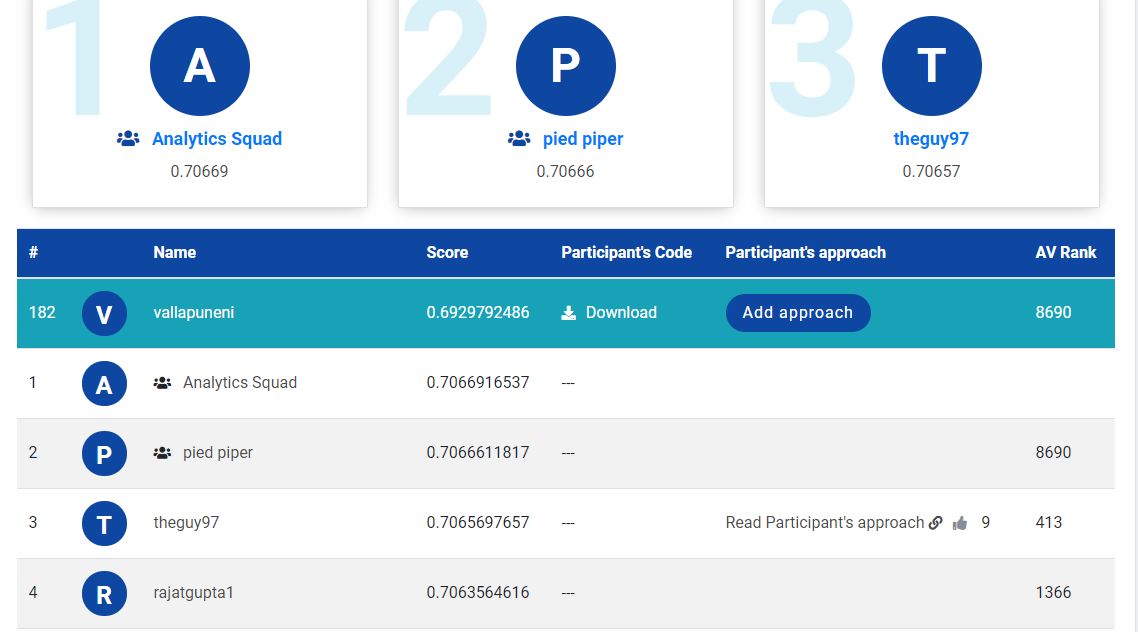

In [3]:
Image(filename='G:\DATASETS\Analytics Vidya\Mobility Analytics\Result.PNG')
### Final Results

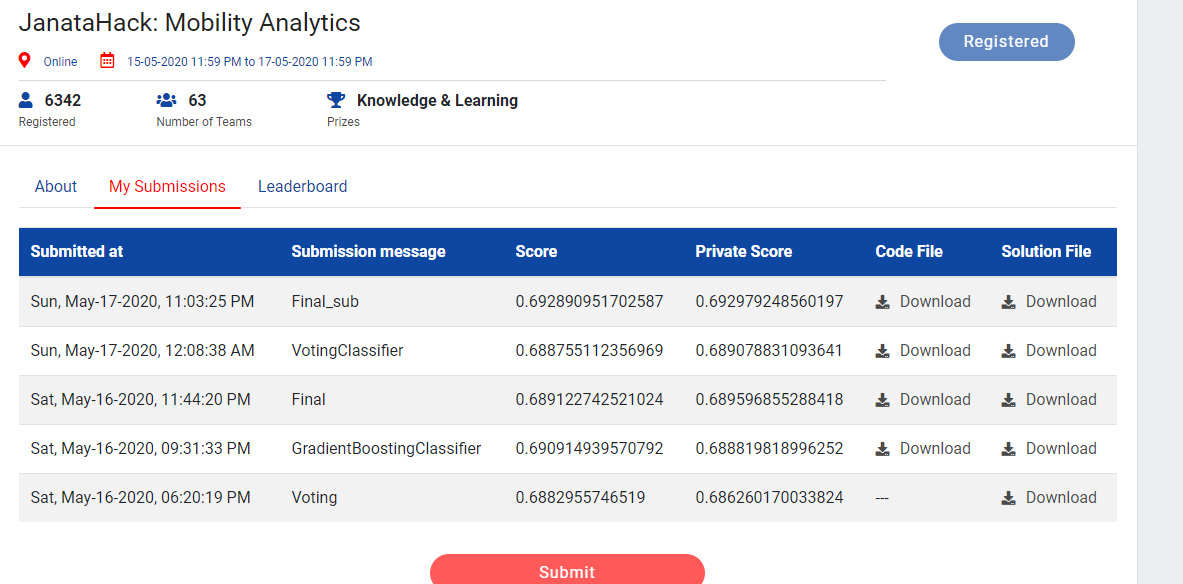

In [4]:
Image(filename='G:\DATASETS\Analytics Vidya\Mobility Analytics\submissions.PNG')
### ALl My Submissions